# Bar Charts

In [1]:
from altair import *
population = load_dataset('population')

## Single bar chart

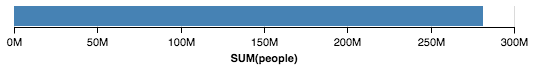

In [2]:
Chart(population).mark_bar().encode(
    x='sum(people)',
).transform_data(filter="datum.year==2000")

## Bar chart

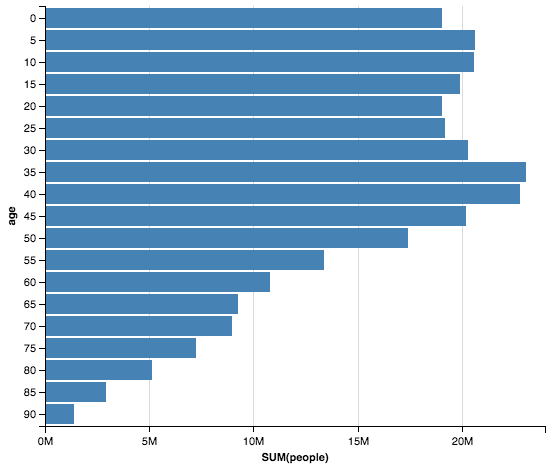

In [3]:
Chart(population).mark_bar().encode(
    x='sum(people)',
    y='age:O'
).transform_data(filter="datum.year==2000")

## Stacked bar chart

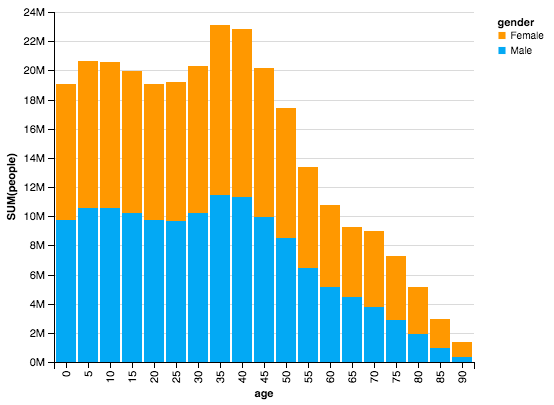

In [10]:
chart = Chart(population).mark_bar().encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"]))
).transform_data(
    filter='datum.year==2000',
    calculate=[Formula(field='gender', expr='datum.sex == 2 ? "Female" : "Male"')]
)
t = chart.transform
chart

## Layered bar chart

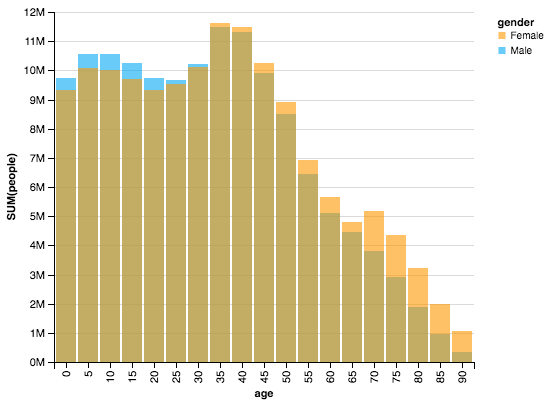

In [11]:
Chart(population, transform=t).mark_bar(
    opacity=0.6,
    stacked='none'
).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"]))
)

## Normalized stacked bar chart

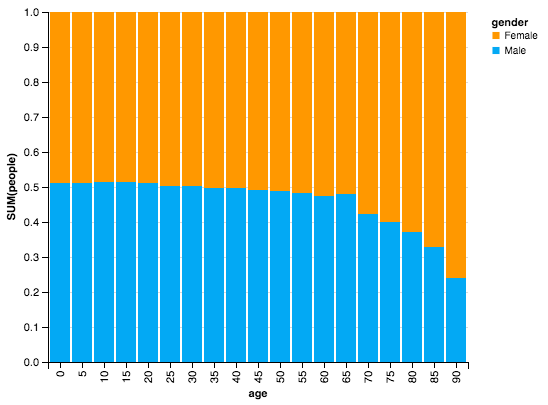

In [12]:
Chart(population, transform=t).mark_bar(
    stacked='normalize'
).encode(
    x='age:O',
    y='sum(people):Q',
    color=Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"]))
)

## Grouped bar chart

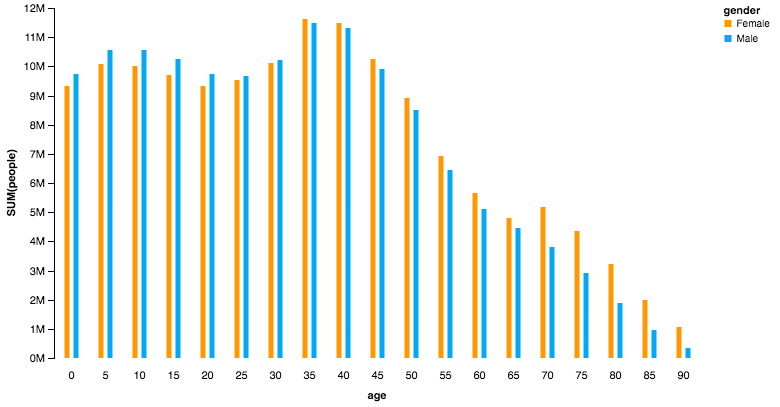

In [14]:
Chart(population, transform=t).mark_bar().encode(
    X('gender:N', axis=False, scale=Scale(bandSize=6)),
    Y('sum(people):Q', axis=Axis(grid=False)),
    Color('gender:N', scale=Scale(range=["#FF9800", "#03A9F4"])),
    Column('age:O', axis=Axis(orient='bottom'))
).configure(
    facet=FacetConfig(cell=CellConfig(strokeWidth=0, height=250))
)

## Histogram

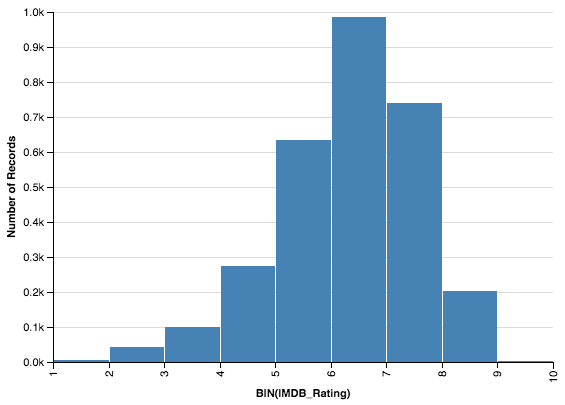

In [9]:
data = load_dataset('movies')
Chart(data).mark_bar().encode(
    x=X('IMDB_Rating', bin=Bin(maxbins=10)),
    y='count(*):Q',
)